[*********************100%***********************]  1 of 1 completed

Fetching S&P 500 data.
Data shape: (496, 1)
Price             Close
Ticker            ^GSPC
Date                   
2024-01-02  4742.830078
2024-01-03  4704.810059
2024-01-04  4688.680176
2024-01-05  4697.240234
2024-01-08  4763.540039
Training samples: 316
Validation samples: 39
Test samples: 41

Building LSTM model.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,701 (596.49 KB)

 Trainable params: 152,701 (596.49 KB)

 Non-trainable params: 0 (0.00 B)


Training the model.
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 0.1183 - val_loss: 0.1173
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.0211 - val_loss: 0.0131
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.0095 - val_loss: 0.0248
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - loss: 0.0093 - val_loss: 0.0206
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.0088 - val_loss: 0.0163
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0074 - val_loss: 0.0162
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0065 - val_loss: 0.0110
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 0.0064 - val_loss: 0.0099
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - loss: 0.0066 - val_loss: 0.0025
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 12/50
10/10 ━━━━━━━━━━━━━

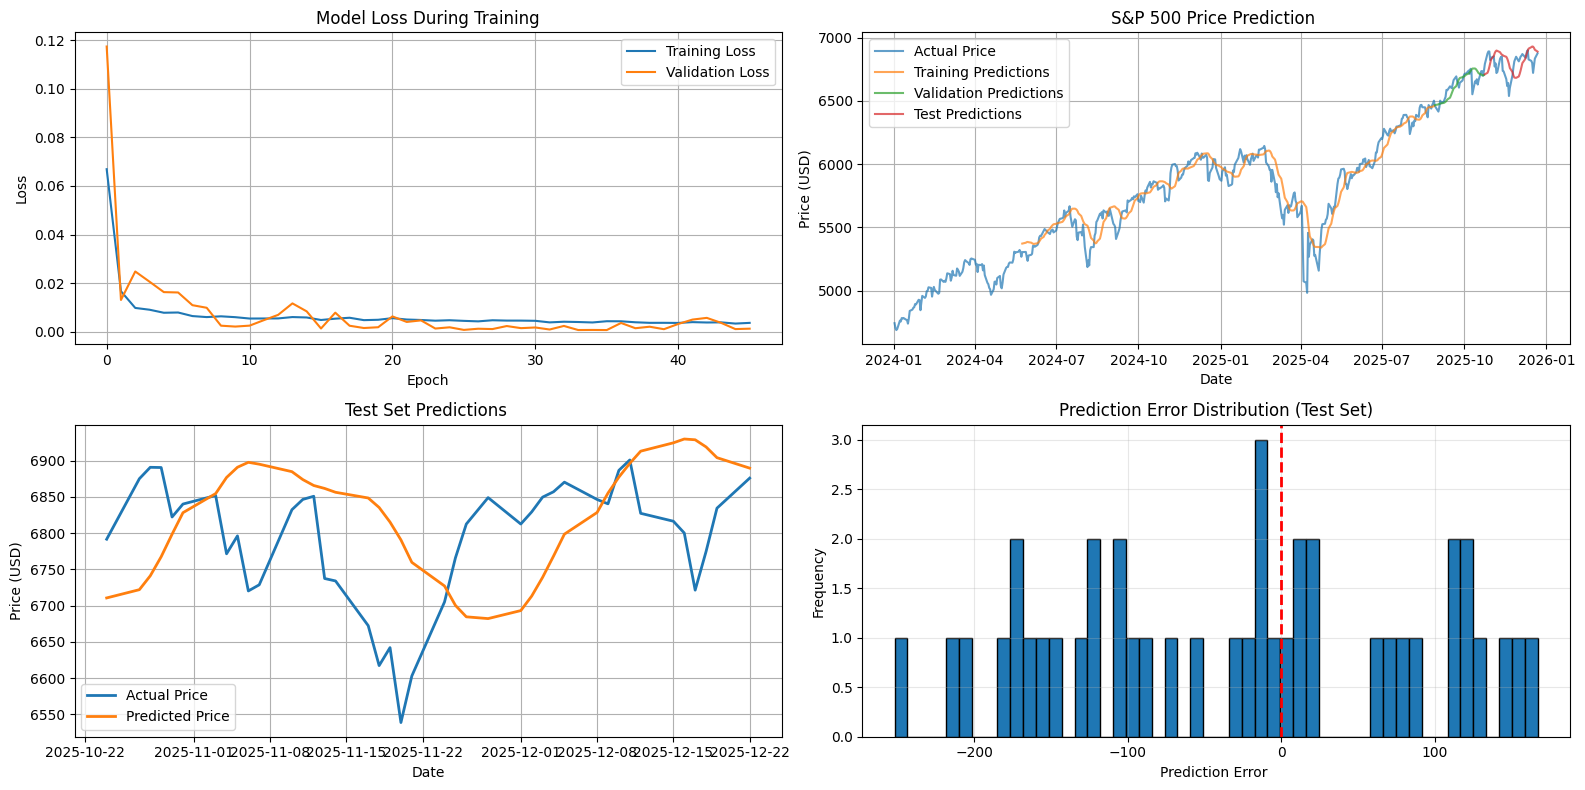


Visualization saved as 'sp500_lstm_prediction.png'

Predicting Next 30 Days 


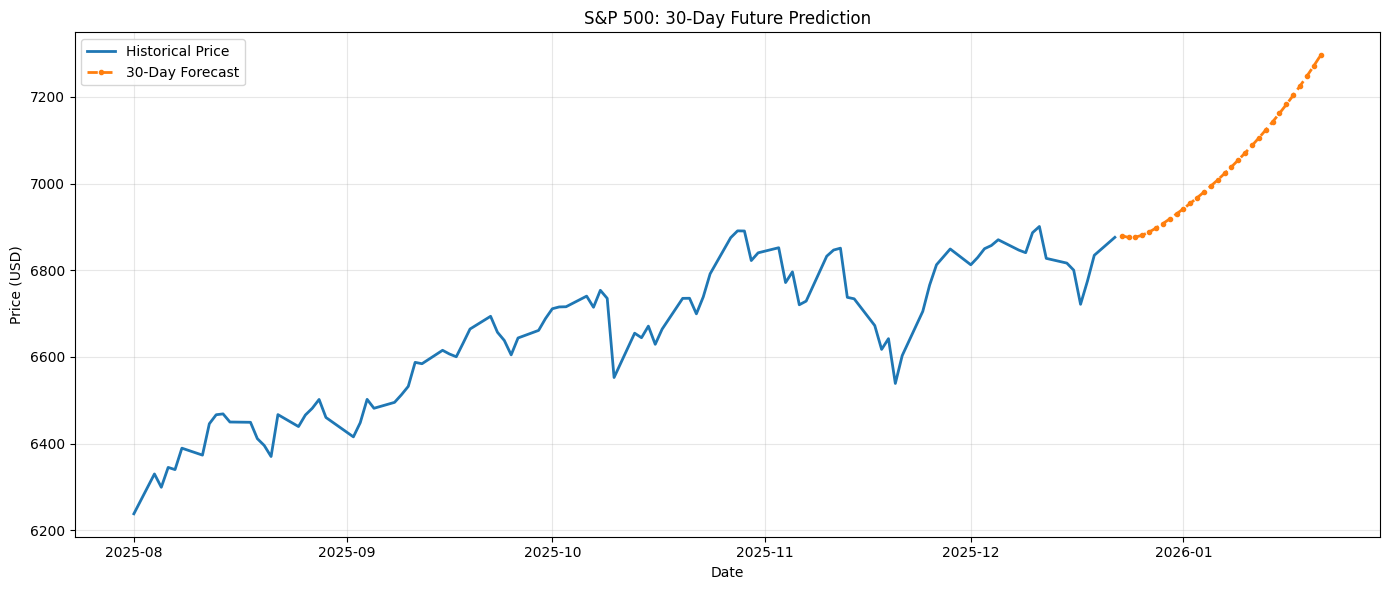


Predicted price after 30 days: $7296.09
Current price: $6875.95
Predicted change: 6.11%


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')



print("Fetching S&P 500 data.")
ticker = "^GSPC"
start_date = "2024-01-01"
end_date = "2030-12-31"



df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]
print(f"Data shape: {df.shape}")
print(df.head())


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


def create_sequences(data, seq_length):
    """
    Create sequences of historical data for LSTM training
    Args:
        data: scaled price data
        seq_length: number of time steps to look back
    Returns:
        X: input sequences
        y: target values
    """
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


seq_length = 100



X, y = create_sequences(scaled_data, seq_length)



X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.10)
test_size = len(X) - train_size - val_size


X_train = X[:train_size]
y_train = y[:train_size]


X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]


X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]


print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

print("\nBuilding LSTM model.")
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),

    LSTM(units=100, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50, return_sequences=False),
    Dropout(0.2),

    Dense(units=25),
    Dense(units=1)
])


model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


print("\nTraining the model.")
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


print("\nMaking predictions.")
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))


val_predictions = scaler.inverse_transform(val_predictions)
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))


test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print("\n Model Performance Metrics ")


train_mae = mean_absolute_error(y_train_actual, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
train_r2 = r2_score(y_train_actual, train_predictions)


print(f"\nTraining Set:")
print(f"MAE: ${train_mae:.2f}")
print(f"RMSE: ${train_rmse:.2f}")
print(f"R² Score: {train_r2:.4f}")

val_mae = mean_absolute_error(y_val_actual, val_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val_actual, val_predictions))
val_r2 = r2_score(y_val_actual, val_predictions)


print(f"\nValidation Set:")
print(f"MAE: ${val_mae:.2f}")
print(f"RMSE: ${val_rmse:.2f}")
print(f"R² Score: {val_r2:.4f}")

test_mae = mean_absolute_error(y_test_actual, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
test_r2 = r2_score(y_test_actual, test_predictions)
test_accuracy = 100 - (test_mae / y_test_actual.mean() * 100)


print(f"\nTest Set:")
print(f"MAE: ${test_mae:.2f}")
print(f"RMSE: ${test_rmse:.2f}")
print(f"R² Score: {test_r2:.4f}")
print(f"Accuracy: {test_accuracy:.2f}%")

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
train_indices = df.index[seq_length:seq_length+len(train_predictions)]
val_indices = df.index[seq_length+len(train_predictions):seq_length+len(train_predictions)+len(val_predictions)]
test_indices = df.index[seq_length+len(train_predictions)+len(val_predictions):]


plt.plot(df.index, df['Close'], label='Actual Price', alpha=0.7)
plt.plot(train_indices, train_predictions, label='Training Predictions', alpha=0.7)
plt.plot(val_indices, val_predictions, label='Validation Predictions', alpha=0.7)
plt.plot(test_indices, test_predictions, label='Test Predictions', alpha=0.7)
plt.title('S&P 500 Price Prediction ')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(test_indices, y_test_actual, label='Actual Price', linewidth=2)
plt.plot(test_indices, test_predictions, label='Predicted Price', linewidth=2)
plt.title('Test Set Predictions ')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
errors = y_test_actual - test_predictions
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Prediction Error Distribution (Test Set)')
plt.xlabel('Prediction Error ')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig('sp500_lstm_prediction.png', dpi=300, bbox_inches='tight')
plt.show()


print("\nVisualization saved as 'sp500_lstm_prediction.png'")



print("\nPredicting Next 30 Days ")
def predict_future(model, last_sequence, days=30):
    """Predict future prices"""
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days):

        next_pred = model.predict(current_sequence.reshape(1, seq_length, 1), verbose=0)
        future_predictions.append(next_pred[0, 0])


        current_sequence = np.append(current_sequence[1:], next_pred)

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_sequence = scaled_data[-seq_length:]
future_prices = predict_future(model, last_sequence, days=30)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=31, freq='D')[1:]

plt.figure(figsize=(14, 6))
plt.plot(df.index[-100:], df['Close'][-100:], label='Historical Price', linewidth=2)
plt.plot(future_dates, future_prices, label='30-Day Forecast',
         linewidth=2, linestyle='--', marker='o', markersize=3)
plt.title('S&P 500: 30-Day Future Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sp500_future_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPredicted price after 30 days: ${float(future_prices[-1][0]):.2f}")
print(f"Current price: ${float(df['Close'].iloc[-1]):.2f}")
print(f"Predicted change: {((float(future_prices[-1][0]) / float(df['Close'].iloc[-1])) - 1) * 100:.2f}%")
